In [8]:
import matplotlib.pyplot as plt
import pandas as pa
%matplotlib inline
import numpy as np

In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
custom_data = pa.read_csv(url,names=['classes','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
custom_data.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


On importe les modules importants et notre database, puis on affiche rapidement la tête de cet ensemble de données.

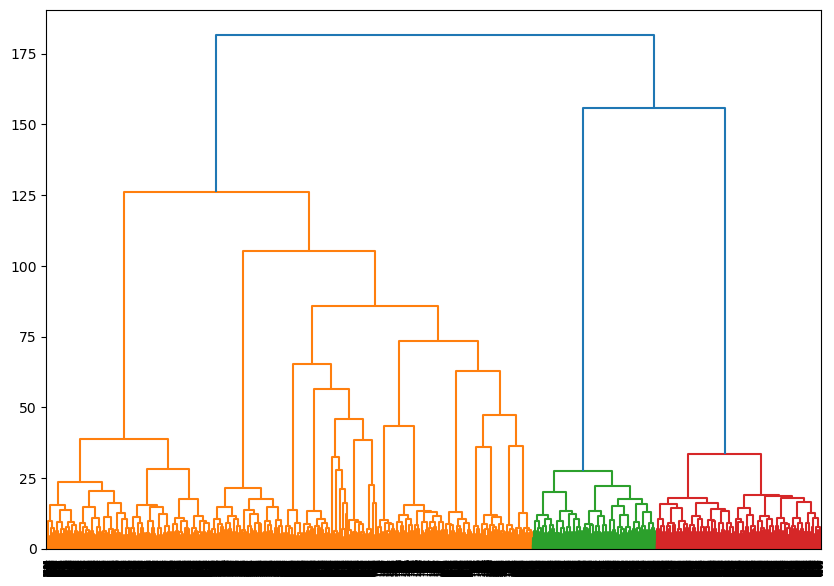

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(custom_data)

encoded_array = encoded_data.toarray()

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("")
dend = shc.dendrogram(shc.linkage(encoded_array, method='ward'))

On importe la classe OneHotEncoder depuis la bibliothèque sklearn.preprocessing.
On crée une instance de l'encodeur OneHotEncoder en faisant appel à son constructeur OneHotEncoder().
On applique l'encodage One-Hot à notre jeu de données en appelant la méthode fit_transform() de l'encodeur sur notre ensemble de données custom_data.
On convertit le résultat de l'encodage en un tableau numpy en appelant la méthode toarray() sur le résultat de l'encodage.
On importe la bibliothèque scipy.cluster.hierarchy sous le nom raccourci shc.
On crée une figure de taille (10, 7) en appelant la fonction figure() sur la bibliothèque plt de la bibliothèque matplotlib.pyplot.
On donne un titre à notre figure en appelant la fonction title() sur plt et en lui passant une chaîne de caractères vide.
On crée un dendrogramme en appelant la fonction dendrogram() de shc et en lui passant le résultat de la fonction linkage() de shc, qui prend le tableau encoded_array comme argument, ainsi que la méthode 'ward' pour la mesure de la distance entre les clusters.

Le dendrogramme est une représentation graphique d'une hiérarchie de clusters. Dans ce cas, les données ont été encodées en utilisant la méthode One-Hot, puis regroupées en clusters en utilisant la méthode 'ward'. Le dendrogramme montre comment les clusters ont été formés et comment ils se regroupent. Les feuilles du dendrogramme représentent les échantillons individuels, tandis que les nœuds internes représentent les clusters.

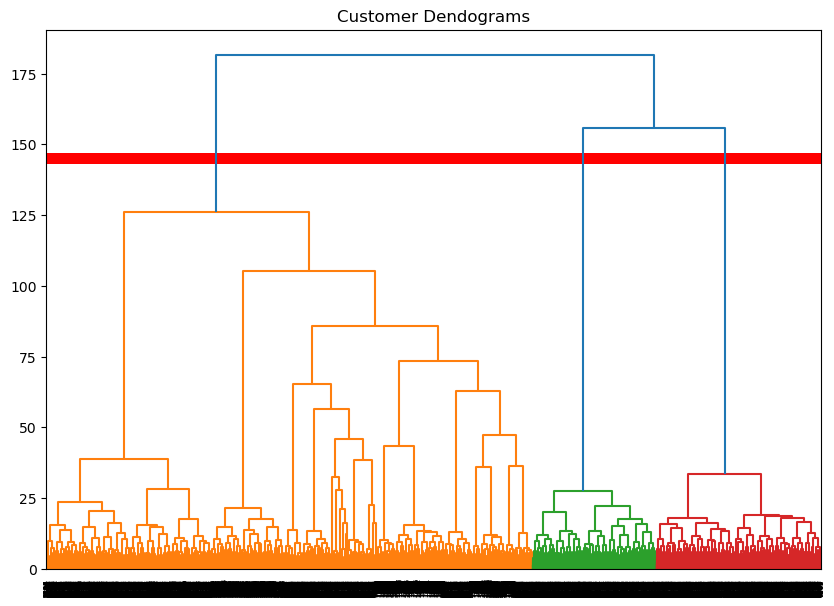

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(encoded_array, method='ward'))
hline = np.array([[x,145] for x in range(145,700000)])
plt.scatter(hline[:,0], hline[:,1], color='red')

Ce code utilise le dendrogramme créé précédemment pour identifier le nombre optimal de clusters à utiliser dans l'analyse de clustering.
La ligne hline = np.array([[x,145] for x in range(145,700000)]) crée un tableau numpy qui contient des coordonnées pour une ligne horizontale. Les coordonnées sont définies pour que la ligne soit tracée à la hauteur de 145, ce qui correspond au nombre optimal de clusters identifié dans le dendrogramme.

La ligne suivante, plt.scatter(hline[:,0], hline[:,1], color='red'), trace cette ligne horizontale en rouge sur le dendrogramme existant. Cela permet de visualiser facilement le nombre optimal de clusters pour l'ensemble de données.

En somme, ce code permet d'identifier le nombre optimal de clusters à utiliser dans l'analyse de clustering pour les données de champignons.

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(encoded_array)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Le code utilise l'algorithme de clustering agglomératif pour regrouper les données en 3 clusters (n_clusters=3) en utilisant la distance euclidienne comme mesure de similarité (affinity='euclidean') et la méthode de liaison Ward (linkage='ward').

Le résultat est un tableau d'entiers qui indique à quel cluster chaque échantillon de données appartient. Les entiers sont compris entre 0 et 2 car il y a 3 clusters. Par exemple, le premier échantillon appartient au cluster 0, le deuxième échantillon appartient également au cluster 0 et ainsi de suite.

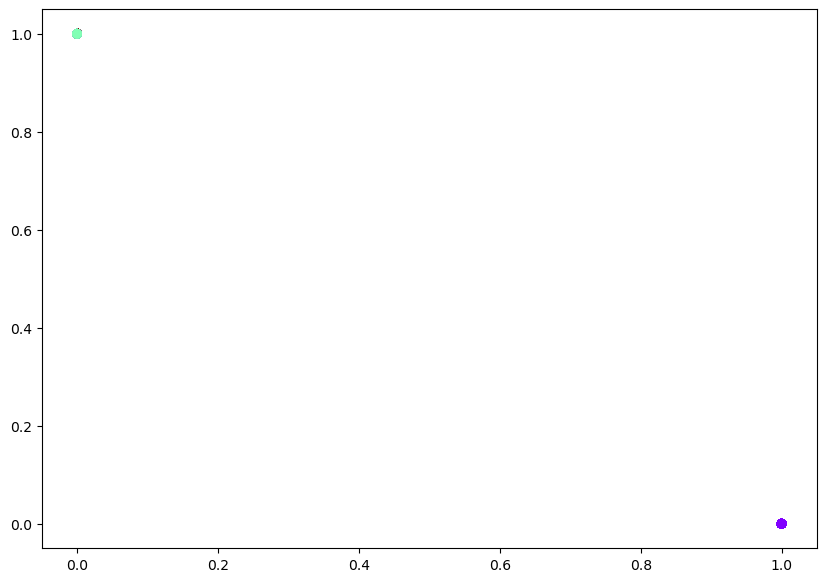

In [13]:
plt.figure(figsize=(10, 7))
data = encoded_array
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Le problémes de ce graphique est qu'il mets en 2 dimensions, les données que l'on as qui vont bien plus loin que 2 dimensions, il y a 23 collomnes donc au moins 21 dimensions dans nos données de champignons

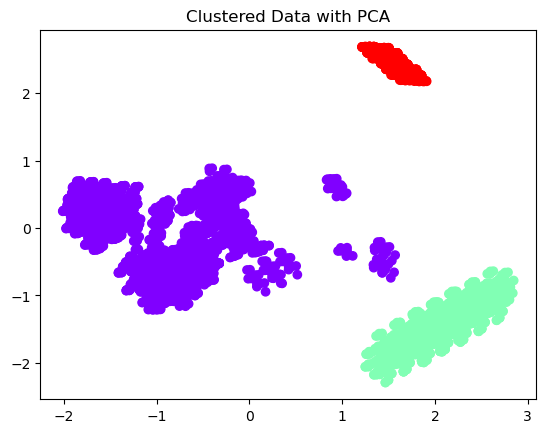

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=21)
pca.fit(encoded_array)
reduced_data = pca.transform(encoded_array)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(encoded_array)

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=cluster_labels, cmap='rainbow')
plt.title('Clustered Data with PCA')
plt.show()

Le code utilise la méthode de l'analyse en composantes principales (PCA) pour réduire la dimensionnalité des données à deux dimensions, puis applique la même méthode de clustering hiérarchique avec l'algorithme d'agrégation ascendante (AgglomerativeClustering) pour diviser les données en trois clusters. Enfin, il affiche un graphe de dispersion des données réduites en deux dimensions, où chaque point est coloré selon le cluster auquel il appartient.

Le résultat montre des groupes de points qui sont plus séparés que dans le graphe précédent, ce qui suggère que la méthode PCA a réussi à mieux discriminer les différents groupes de donnée.

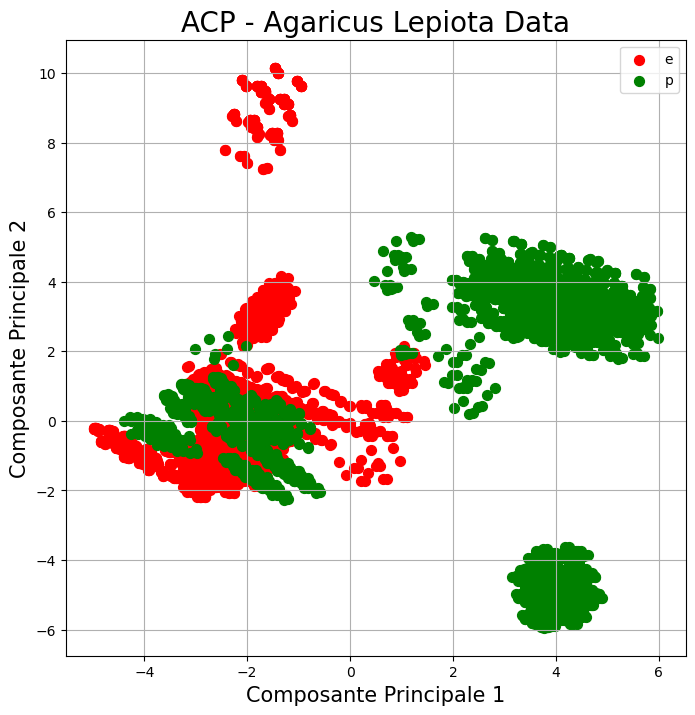

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Importer les données
data = pd.read_csv("agaricus-lepiota.data", header=None)

# Séparer les variables explicatives des labels
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Encoder les variables catégorielles
X = pd.get_dummies(X)

# Centrer et réduire les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser l'ACP
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Créer un DataFrame avec les résultats de l'ACP
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['label'] = y

# Afficher le graphe
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Composante Principale 1', fontsize = 15)
ax.set_ylabel('Composante Principale 2', fontsize = 15)
ax.set_title('ACP - Agaricus Lepiota Data', fontsize = 20)

targets = ['e', 'p']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = pca_df['label'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1'],
               pca_df.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()
plt.show()

Ce code effectue une Analyse en Composantes Principales (ACP) sur le dataset Agaricus Lepiota en utilisant la librairie scikit-learn de Python. Il commence par importer les bibliothèques nécessaires, puis charge le jeu de données en utilisant Pandas. Les variables explicatives sont ensuite séparées des labels et encodées en utilisant la méthode "get_dummies" de Pandas pour encoder les variables catégorielles. Les données sont ensuite centrées et normalisées à l'aide de StandardScaler de scikit-learn. Ensuite, une ACP avec deux composantes principales est réalisée à l'aide de la fonction PCA de scikit-learn. Les deux premières composantes principales sont ensuite stockées dans un DataFrame, qui est utilisé pour tracer un graphe 2D des données. Les données sont colorées en fonction de leur étiquette (comestible ou vénéneux) et les légendes sont ajoutées pour chaque classe. Le résultat montre la séparation des deux classes dans l'espace des deux premières composantes principales.